In [2]:
pip install --upgrade pillow


Note: you may need to restart the kernel to use updated packages.


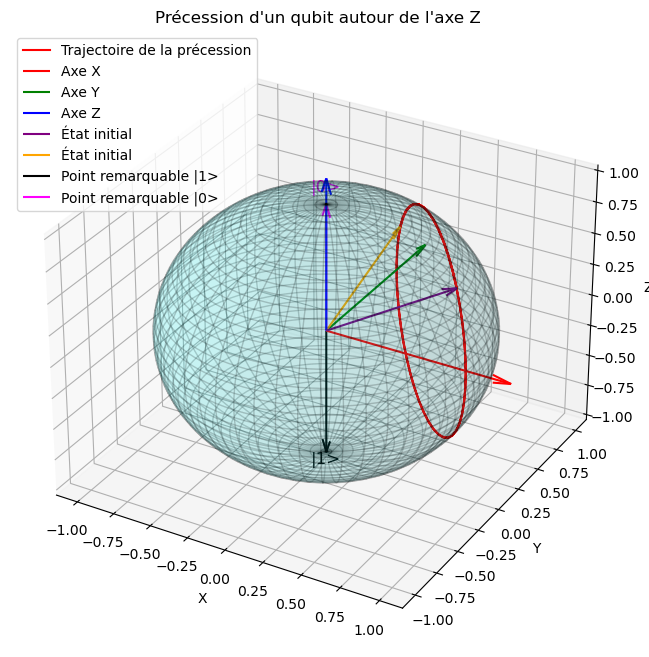

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Charger les données depuis le fichier CSV
data = pd.read_csv("test.csv")
data

# Extraire les coordonnées x, y, z de la trajectoire du qubit
x_vals = data["x"].values
y_vals = data["y"].values
z_vals = data["z"].values

# Créer la figure de la sphère de Bloch
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Créer la sphère de Bloch
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

# Tracer la sphère de Bloch
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='cyan', alpha=0.1, edgecolor='k')

# Tracer la trajectoire du qubit sur la sphère de Bloch
ax.plot(x_vals, y_vals, z_vals, color='r', label='Trajectoire de la précession')

# Afficher les axes
ax.quiver(0, 0, 0, 1.2, 0, 0, color="red", arrow_length_ratio=0.1, label="Axe X")
ax.quiver(0, 0, 0, 0, 1.2, 0, color="green", arrow_length_ratio=0.1, label="Axe Y")
ax.quiver(0, 0, 0, 0, 0, 1.2, color="blue", arrow_length_ratio=0.1, label="Axe Z")

# État initial (premier point de la trajectoire)
ax.quiver(0, 0, 0, x_vals[0], y_vals[0], z_vals[0], color="purple", arrow_length_ratio=0.1, label="État initial")
ax.quiver(0, 0, 0, x_vals[-1], y_vals[-1], z_vals[-1], color="orange", arrow_length_ratio=0.1, label="État initial")


# Ajouter des flèches pour des points remarquables sur la sphère
# Exemple : Flèches pour les points (0, 0, 1), (0, 0, -1)
ax.quiver(0, 0, 0, 0, 0, -1, color="black", arrow_length_ratio=0.1, label="Point remarquable |1>")
ax.quiver(0, 0, 0, 0, 0, 1, color="magenta", arrow_length_ratio=0.1, label="Point remarquable |0>")

# Ajouter le texte au bout des flèches des points remarquables
ax.text(0, 0, -1.1, "|1>", color="black", fontsize=12, ha='center')
ax.text(0, 0, 1.1, "|0>", color="magenta", fontsize=12, ha='center')

# Configurer les labels et le titre
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Précession d'un qubit autour de l'axe Z")
ax.legend()

# Afficher la figure
plt.show()

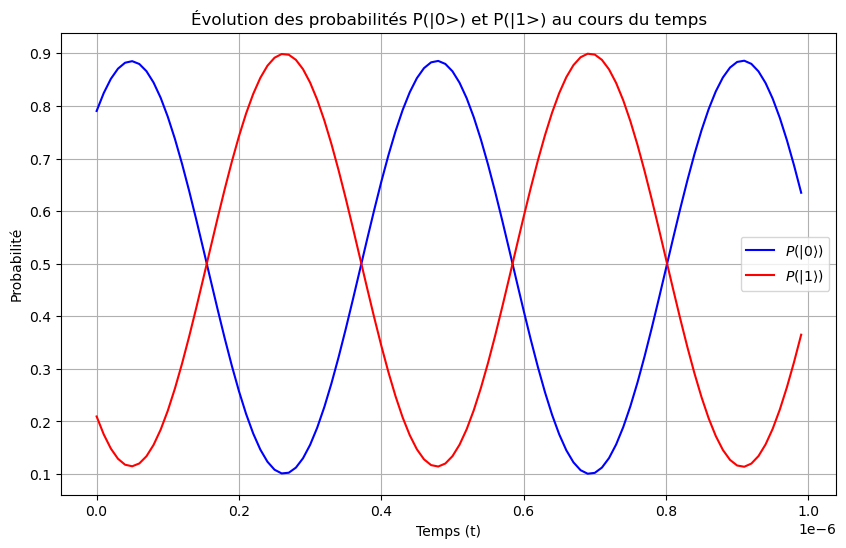

In [24]:
# Extraire les colonnes de temps et les probabilités
times = data["t"].values
prob_psi0 = data["prob_psi0"].values
prob_psi1 = data["prob_psi1"].values

# Tracer les probabilités en fonction du temps
plt.figure(figsize=(10, 6))

# Tracer P(|0>) et P(|1>) en fonction du temps
plt.plot(times, prob_psi0, label=r'$P(|0\rangle)$', color='blue')
plt.plot(times, prob_psi1, label=r'$P(|1\rangle)$', color='red')

# Ajouter des labels et une légende
plt.xlabel('Temps (t)')
plt.ylabel('Probabilité')
plt.title('Évolution des probabilités P(|0>) et P(|1>) au cours du temps')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Charger les données depuis le fichier CSV
data = pd.read_csv("test.csv")

# Extraire les coordonnées x, y, z de la trajectoire du qubit
x_vals = data["x"].values
y_vals = data["y"].values
z_vals = data["z"].values

# Nombre de frames pour une animation fluide
frames = 200

# Interpoler les données pour une animation fluide
x_vals_interp = np.interp(np.linspace(0, len(x_vals) - 1, frames), np.arange(len(x_vals)), x_vals)
y_vals_interp = np.interp(np.linspace(0, len(y_vals) - 1, frames), np.arange(len(y_vals)), y_vals)
z_vals_interp = np.interp(np.linspace(0, len(z_vals) - 1, frames), np.arange(len(z_vals)), z_vals)

# Créer la figure de la sphère de Bloch
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Créer la sphère de Bloch
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
sphere_x = np.outer(np.cos(u), np.sin(v))
sphere_y = np.outer(np.sin(u), np.sin(v))
sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

# Tracer la sphère de Bloch
ax.plot_surface(sphere_x, sphere_y, sphere_z, color="cyan", alpha=0.1, edgecolor="k")

# Tracer les axes X, Y, Z
ax.quiver(0, 0, 0, 1.2, 0, 0, color="red", arrow_length_ratio=0.1, label="Axe X")
ax.quiver(0, 0, 0, 0, 1.2, 0, color="green", arrow_length_ratio=0.1, label="Axe Y")
ax.quiver(0, 0, 0, 0, 0, 1.2, color="blue", arrow_length_ratio=0.1, label="Axe Z")

# État initial (premier point de la trajectoire)
ax.quiver(0, 0, 0, x_vals[0], y_vals[0], z_vals[0], color="purple", arrow_length_ratio=0.1, label="État initial")

# Ajouter des flèches pour des points remarquables sur la sphère
# Exemple : Flèches pour les points (0, 0, 1), (0, 0, -1)
ax.quiver(0, 0, 0, 0, 0, -1, color="black", arrow_length_ratio=0.1, label="Point remarquable |1>")
ax.quiver(0, 0, 0, 0, 0, 1, color="magenta", arrow_length_ratio=0.1, label="Point remarquable |0>")

# Ajouter le texte au bout des flèches des points remarquables
ax.text(0, 0, -1.1, "|1>", color="black", fontsize=12, ha='center')
ax.text(0, 0, 1.1, "|0>", color="magenta", fontsize=12, ha='center')

# Initialiser l'état du qubit
state, = ax.plot([], [], [], "o", color="purple", markersize=8, label="État du Qubit")

# Initialiser la flèche qui suivra la trajectoire du spin (en violet)
trajectory_arrow = ax.quiver(0, 0, 0, x_vals_interp[0], y_vals_interp[0], z_vals_interp[0], color="purple", arrow_length_ratio=0.1, label="Flèche du Qubit")

# Ajouter un titre statique à la figure
ax.set_title("Trajectoire du Qubit sur la Sphère de Bloch", fontsize=12)

# Fonction pour initialiser l'animation
def init():
    state.set_data([], [])
    state.set_3d_properties([])
    trajectory_arrow.set_segments([])  # Effacer la flèche
    return state, trajectory_arrow,

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mettre à jour la position du qubit
    state.set_data([x_vals_interp[frame]], [y_vals_interp[frame]])  # Notez les crochets pour faire des séquences
    state.set_3d_properties([z_vals_interp[frame]])  # Notez les crochets pour faire des séquences
    
    # Mettre à jour la flèche qui suit la trajectoire du spin
    trajectory_arrow.set_segments([[[0, 0, 0], [x_vals_interp[frame], y_vals_interp[frame], z_vals_interp[frame]]]]) 
    
    # Vous pouvez également mettre à jour le titre dynamiquement si vous le souhaitez
    ax.set_title("Trajectoire du Qubit sur la Sphère de Bloch", fontsize=16)

    return state, trajectory_arrow

# Créer l'animation
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Sauvegarder l'animation au format GIF
ani.save("qubit_precession_DYN.gif", writer="pillow", fps=60)

plt.show()